In [58]:
import numpy as np
import pandas as pd
import matplotlib as plt
from matplotlib import pyplot as plt
import seaborn as sns
import math

In [2]:
df= pd.read_csv("Mall_Customers.csv")

In [4]:
df

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [6]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [7]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [8]:
# Data Consest Of?
df.shape

(200, 5)

In [9]:
df.count() 

CustomerID                200
Gender                    200
Age                       200
Annual Income (k$)        200
Spending Score (1-100)    200
dtype: int64

In [10]:
# Data Types
df.dtypes

CustomerID                 int64
Gender                    object
Age                        int64
Annual Income (k$)         int64
Spending Score (1-100)     int64
dtype: object

In [111]:
for col in df.columns:
    prct_missing = np.mean(df[col].isnull()).round(3)
    print(f'{col} ->  {prct_missing}')

CustomerID ->  0.0
Gender ->  0.0
Age ->  0.0
Annual Income (k$) ->  0.0
Spending Score (1-100) ->  0.0


In [14]:
df.duplicated().sum()

0

In [12]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [22]:
df['Gender'].value_counts()

Female    112
Male       88
Name: Gender, dtype: int64

In [39]:
print('total Prc of Each Gender : \n' , df['Gender'].value_counts('Male')*100 )

total Prc of Each Gender : 
 Female    56.0
Male      44.0
Name: Gender, dtype: float64


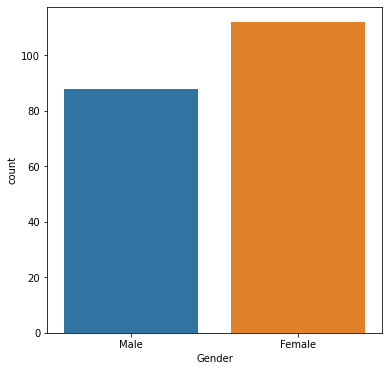

In [46]:
plt.figure(figsize=(6,6))
sns.countplot(x=df['Gender'], data=df)
plt.show()

In [102]:
pd.DataFrame(df.Age.describe().round(2))

,Age
count,200.00
mean,38.85
std,13.97
min,18.00
25%,28.75
50%,36.00
75%,49.00
max,70.00


In [87]:
print('sum of ppl above avg => ',df['Age'].loc[df['Age']>math.ceil(df['Age'].mean())].count())
print('sum of ppl below avg => ',df['Age'].loc[df['Age']<math.ceil(df['Age'].mean())].count())
print('sum of ppl is avg => ',df['Age'].loc[df['Age']==math.ceil(df['Age'].mean())].count())

sum of ppl above avg =>  84
sum of ppl below avg =>  113
sum of ppl is avg =>  3


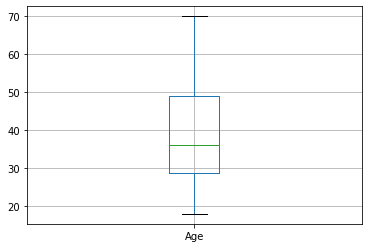

In [61]:
df.boxplot('Age')
plt.show()

In [101]:
pd.DataFrame(df['Annual Income (k$)'].describe().round())

,Annual Income (k$)
count,200.0
mean,61.0
std,26.0
min,15.0
25%,42.0
50%,62.0
75%,78.0
max,133.0


#### Classifing 

In [86]:
print('PPL whose income above AVG => ',df['Annual Income (k$)'].loc[df['Annual Income (k$)']>math.ceil(df['Annual Income (k$)'].mean())].count())
print('PPL whose income Below AVG => ',df['Annual Income (k$)'].loc[df['Annual Income (k$)']<math.ceil(df['Annual Income (k$)'].mean())].count())
print('PPL whose income is AVG => ',df['Annual Income (k$)'].loc[df['Annual Income (k$)']==math.ceil(df['Annual Income (k$)'].mean())].count())

PPL whose income above AVG =>  100
PPL whose income Below AVG =>  98
PPL whose income is AVG =>  2


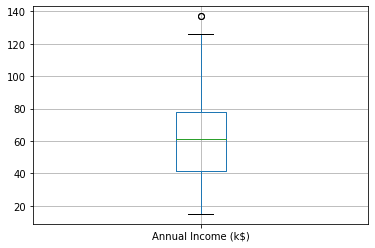

In [88]:
df.boxplot('Annual Income (k$)')
plt.show()

#### finxing the 'Annual Income (k$)' out laier

In [89]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=col.quantile([0.25,0.75])
    IQR=Q3-Q1
    lower_range=Q1-(1.5*IQR)
    upper_range=Q3+(1.5*IQR)
    return lower_range , upper_range

In [91]:
lowincome,uppincome=remove_outlier(df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']>uppincome,uppincome,df['Annual Income (k$)'])
df['Annual Income (k$)']=np.where(df['Annual Income (k$)']<lowincome,lowincome,df['Annual Income (k$)'])

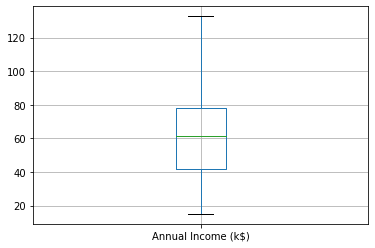

In [92]:
df.boxplot('Annual Income (k$)')
plt.show()

In [100]:
pd.DataFrame(df['Spending Score (1-100)'].describe().round())

,Spending Score (1-100)
count,200.0
mean,50.0
std,26.0
min,1.0
25%,35.0
50%,50.0
75%,73.0
max,99.0


In [106]:
print('ppl in surviving category => ',df['Spending Score (1-100)'].loc[df['Spending Score (1-100)']<math.ceil(df['Spending Score (1-100)'].mean())].count())
print('ppl in middle category => ',df['Spending Score (1-100)'].loc[df['Spending Score (1-100)']==math.ceil(df['Spending Score (1-100)'].mean())].count())
print('ppl in rich category => ',df['Spending Score (1-100)'].loc[df['Spending Score (1-100)']>math.ceil(df['Spending Score (1-100)'].mean())].count())

ppl in surviving category =>  103
ppl in middle category =>  3
ppl in rich category =>  94


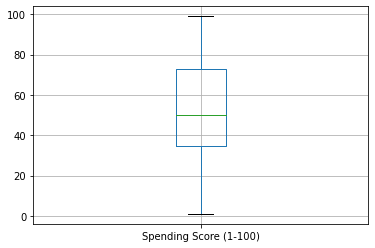

In [110]:
df.boxplot('Spending Score (1-100)')
plt.show()

In [151]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [114]:
df['Gender'][df['Age']>df['Age'].mean()].value_counts()

Female    46
Male      41
Name: Gender, dtype: int64

In [137]:
df['Age'].loc[df['Age']>math.ceil(df['Age'].mean())]

8      64
10     67
12     58
18     52
22     46
       ..
184    41
186    54
188    41
194    47
196    45
Name: Age, Length: 84, dtype: int64

In [152]:
pd.DataFrame(df[df['Age']>math.ceil(df['Age'].mean())][df['Gender']=='Male'][df['Spending Score (1-100)']>math.ceil(df['Spending Score (1-100)'].mean())].value_counts())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10096\310122497.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(df[df['Age']>math.ceil(df['Age'].mean())][df['Gender']=='Male'][df['Spending Score (1-100)']>math.ceil(df['Spending Score (1-100)'].mean())].value_counts())


0
Gender Age Annual Income (k$) Spending Score (1-100)   
Male   40  71.0               95                      1
       49  62.0               56                      1
       59  43.0               60                      1
       65  63.0               52                      1
       67  62.0               59                      1
       70  46.0               56                      1
           49.0               55                      1

In [156]:
pd.DataFrame(df[df['Age']>math.ceil(df['Age'].mean())][df['Gender']=='Female'][df['Spending Score (1-100)']>math.ceil(df['Spending Score (1-100)'].mean())].value_counts())

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_10096\1315339795.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  pd.DataFrame(df[df['Age']>math.ceil(df['Age'].mean())][df['Gender']=='Female'][df['Spending Score (1-100)']>math.ceil(df['Spending Score (1-100)'].mean())].value_counts())


0
Gender Age Annual Income (k$) Spending Score (1-100)   
Female 40  69.0               58                      1
       45  54.0               53                      1
       49  42.0               52                      1
           65.0               59                      1
       50  40.0               55                      1
           67.0               57                      1
       54  47.0               59                      1
       55  57.0               58                      1
       60  50.0               56                      1
       67  47.0               52                      1
       68  59.0               55                      1

In [154]:
df

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,Male,19,15.00,39
1,Male,21,15.00,81
2,Female,20,16.00,6
3,Female,23,16.00,77
4,Female,31,17.00,40
...,...,...,...,...
195,Female,35,120.00,79
196,Female,45,126.00,28
197,Male,32,126.00,74
198,Male,32,132.75,18


### Data Visualization

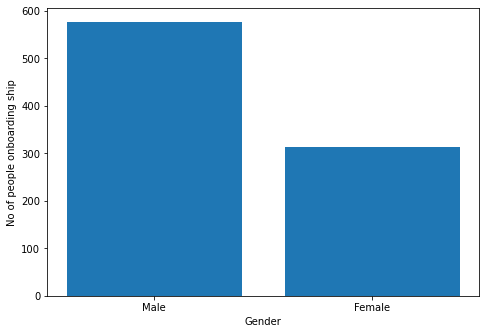

In [157]:
#Plotting
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
gender = ['Male','Female']
index = [577,314]
ax.bar(gender,index)
plt.xlabel("Gender")
plt.ylabel("No of people onboarding ship")
plt.show()

<AxesSubplot:>

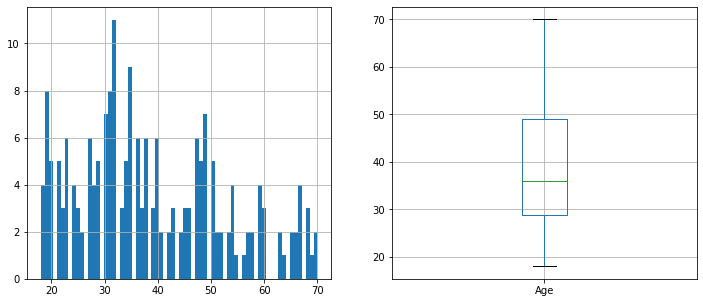

In [159]:
plt.figure(figsize=(12,5))
plt.subplot(121)
df['Age'].hist(bins=70)

plt.subplot(122)
df.boxplot(column='Age', showfliers=False)

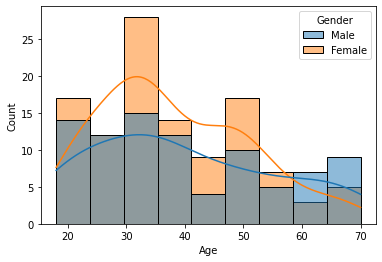

In [165]:
sns.histplot(x='Age', data=df, kde=True, hue='Gender')
plt.show()